<a href="https://colab.research.google.com/github/adarshukla3005/MachineLearning/blob/main/Project2_(MNIST_Digit_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Classification using (CNN)**

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the MNIST data from keras.datasets**

In [161]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [162]:
type(X_train)

numpy.ndarray

In [163]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images

Test data = 10000 images

Image Dimensions -> 28 x 28

Grayscale dimension -> 1

In [164]:
# Printing the image at 10th index
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [165]:
print(X_train[10].shape)

(28, 28)


**Displaying the image**

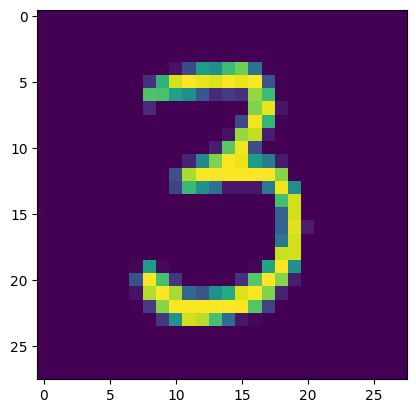

3


In [166]:
plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])

**Image Labels**

In [167]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [168]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_train
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, if not, we have to resize all the photos to same dimensions

**Scaling the Values**

In [169]:
X_train = X_train/255
X_test = X_test/255

In [170]:
# Printing the image at 10th index again
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Builing the Neural network (not exactly CNN)**

In [171]:
# setting up layers of the neural networks

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [172]:
# compiling the neural network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [173]:
# training the Neural network

model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3011 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1445 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9670
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0875 - accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0736 - accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0622 - accuracy: 0.9806
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0554 - accuracy: 0.9822
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0486 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9863
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.037

Training data accuracy = 93.3%

**Accuracy on Test data:**

In [174]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9732


Accuracy wrt to Test data = 93.38%

In [175]:
print(X_test.shape)

(10000, 28, 28)


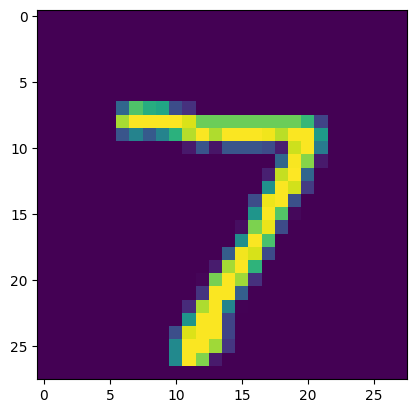

In [176]:
# display the first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [177]:
print(Y_test[0])

7


now checking the individual prediction made by the model

In [178]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [179]:
print(Y_pred.shape)

(10000, 10)


In [180]:
print(Y_pred[0])

[3.9725780e-04 1.2860973e-01 8.8514376e-01 9.9998122e-01 1.8118457e-07
 3.1068853e-01 3.1828864e-09 1.0000000e+00 9.7419620e-01 5.7706445e-01]


model.predict() gives the prediction probability of each class for that data point

In [181]:
#converting the predn probabilities to class label

label_first_image = np.argmax(Y_pred[0])
print(label_first_image)

7


In [182]:
# now converting the predn probabilities for all data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 3, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predictel labels

**Confusion Matrics**

In [183]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [184]:
print(conf_mat)

tf.Tensor(
[[ 962    0    1    1    0    6    3    1    6    0]
 [   0 1122    2    1    0    1    2    0    7    0]
 [   1    3 1001    8    3    2    2    4    8    0]
 [   1    0    3  984    0    7    0    5    9    1]
 [   0    0    3    1  955    4    6    1    2   10]
 [   0    0    0    6    0  874    3    1    5    3]
 [   2    3    0    1    8    6  932    0    6    0]
 [   1    5   10    5    0    2    0  992    3   10]
 [   4    0    2    1    5    9    0    1  951    1]
 [   2    2    0    6   12    8    3    7   13  956]], shape=(10, 10), dtype=int32)


**Creating a heat map for the conf_mat matrix using 'sns' **

Text(0.5, 47.7222222222222, 'Predicted Labels')

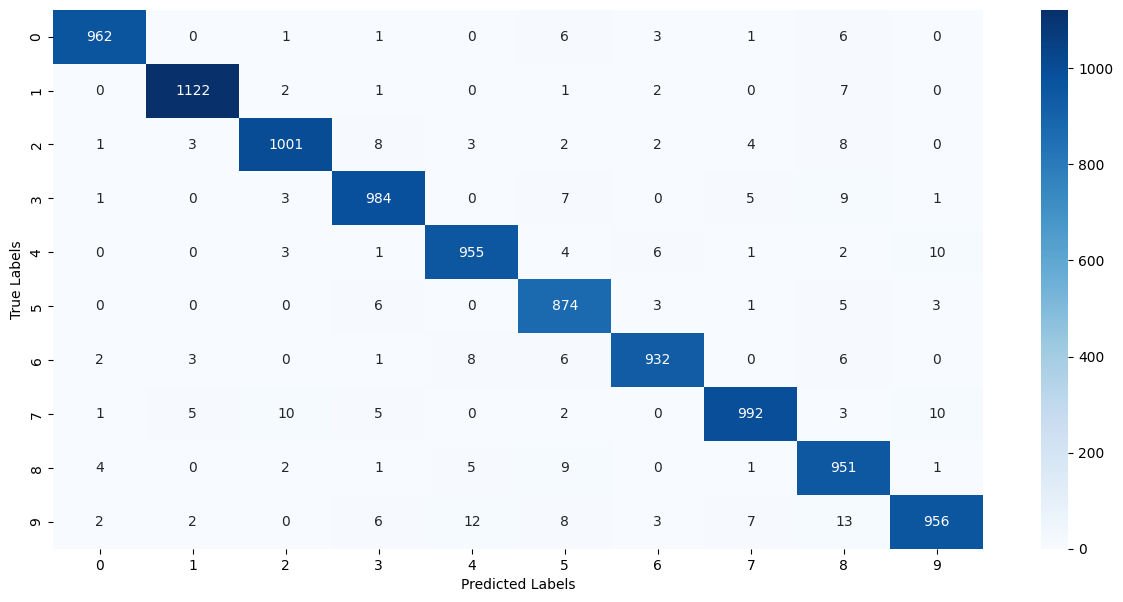

In [185]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building  a Predictive System**

In [186]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [187]:
type(input_image)

numpy.ndarray

In [188]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


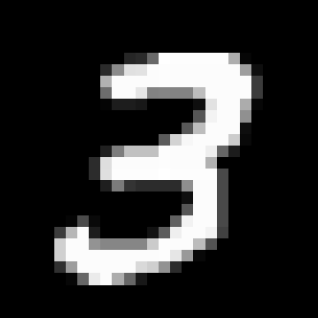

In [189]:
cv2_imshow(input_image)

In [190]:
input_image.shape

(318, 318, 3)

Now making this image like other training images of shape(28x28) by making it grascale and reshaping

In [191]:
gray_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [192]:
gray_img.shape

(318, 318)

In [193]:
gray_img_resized = cv2.resize(gray_img, (28,28))

In [194]:
gray_img_resized.shape

(28, 28)

In [195]:
cv2_imshow(gray_img_resized)

In [196]:
gray_img_resized = gray_img_resized/255

In [197]:
type(gray_img_resized)

numpy.ndarray

In [198]:
image_reshaped = np.reshape(gray_img_resized, [1,28,28])

In [199]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 22ms/step
[[2.0959118e-05 6.1100356e-02 4.5335986e-02 1.0000000e+00 5.4930286e-15
  9.4215959e-01 1.0238148e-17 6.5694273e-01 8.7280726e-01 9.9376255e-01]]


In [200]:
input_pred_label = np.argmax(input_prediction)

In [201]:
print(input_pred_label)

3


**Predictive system**

Path of the image to be Predicted: /content/9.jpg


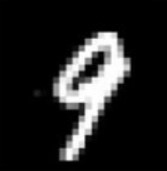

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognized as  9


In [204]:
input_image_path = input('Path of the image to be Predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

gray_img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

gray_img_resized = cv2.resize(gray_img, (28,28))

gray_img_resized = gray_img_resized/255

image_reshaped = np.reshape(gray_img_resized, (1,28,28))

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognized as ', input_pred_label)